In [1]:
import pandas as pd
import re

In [2]:
# Step 1: Read the file
file_path = 'C:\\Users\\Lakshay\\Downloads\\WhatsApp Chat with Shikhaaa\\WhatsApp Chat with Shikhaaa.txt'  # Replace with your file path
with open(file_path, 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

In [3]:
messages = []
pattern = r"(\d{2}/\d{2}/\d{2}), (\d{2}:\d{2}) - ([^:]+): (.+)"  # Date, Time, Sender, Message

In [4]:
for line in chat_data:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        messages.append({"Date": date, "Time": time, "Sender": sender.strip(), "Message": message.strip()})
    else:
        # Handle lines that are continuations of the previous message
        if messages:
            messages[-1]["Message"] += " " + line.strip()

# Step 3: Convert to DataFrame
df = pd.DataFrame(messages)

# Step 4: Save or analyze the data
df  # Display the first few rows
# df.to_csv('whatsapp_chat.csv', index=False)  # Save to a CSV file

,Date,Time,Sender,Message
0,14/05/23,12:16,Lakshayyy,You turned off disappearing messages. Tap to c...
1,14/05/23,17:06,Shikhaaa,lakshay
2,14/05/23,17:07,Shikhaaa,<Media omitted>
3,14/05/23,17:08,Lakshayyy,Yes
4,14/05/23,17:08,Shikhaaa,Mera code check karega
...,...,...,...,...
30061,11/12/24,17:16,Lakshayyy,ok
30062,11/12/24,17:17,Lakshayyy,https://youtu.be/W9mX04IvFRA?si=yIE2si_0ooCHCW...
30063,11/12/24,17:18,Lakshayyy,https://tinyurl.com/lakshikaa
30064,11/12/24,17:18,Lakshayyy,https://lakshaykamat.github.io/my-portfolio/


In [5]:
df['Sender'].value_counts()

Sender
Shikhaaa     15210
Lakshayyy    14856
Name: count, dtype: int64

In [6]:
keyword = 'sex'
pd.options.display.max_colwidth = 500
df[df['Message'].str.contains(keyword, na=False, case=False)]

,Date,Time,Sender,Message
1789,21/06/23,18:45,Shikhaaa,Nhi hi ab sex sux vali book
2235,29/06/23,20:29,Lakshayyy,Kaha gaya tera sexy design 💀🤡
8306,22/11/23,21:53,Shikhaaa,Dikhega beta sexy ruchi nikl ke ayegi😅🤣kuch mahino me
15210,24/03/24,18:28,Shikhaaa,Ek dum end me ayegi thodi feeling ek episode me 5 mint ka sex sux hoga
20498,03/05/24,12:01,Lakshayyy,"USE lakshay_db; -- Use the 'lakshay_db' database -- Create a table to store information about friends CREATE TABLE friends ( id INT AUTO_INCREMENT PRIMARY KEY, -- Unique identifier for each friend name VARCHAR(50) NOT NULL, -- Name of the friend, cannot be null age INT CHECK (age >= 0 AND age <= 100), -- Age of the friend, restricted between 0 and 100 sex ENUM('Male', 'Female') NOT NULL -- Gender of the friend, only 'Male' or 'Female' values allowed ); -- Inserting data into the 'friends' ..."
22248,15/06/24,16:18,Shikhaaa,Yaha aa rha hai jab ovaries endrogen jayada produce krti hai which is male sex harmones jo ki usually Kam hona chahiye Iski vajah se periods mis ar long period ane lagte hai
25241,29/09/24,17:52,Shikhaaa,Boring kya sex thodi Kara diga 😅😂 Acha likha hai
27174,04/11/24,20:01,Shikhaaa,Broke Memers Unisex Custom Oversized T-Shirt | Personalized Custom Printing | Make Your Own T-Shirt | Custom| Gift Your Loved Ones with Custom Oversized T-Shirt https://amzn.in/d/azlbfZy


In [7]:
df['Message Length'] = df['Message'].apply(len)

In [8]:
df.head()

,Date,Time,Sender,Message,Message Length
0,14/05/23,12:16,Lakshayyy,You turned off disappearing messages. Tap to change.,52
1,14/05/23,17:06,Shikhaaa,lakshay,7
2,14/05/23,17:07,Shikhaaa,<Media omitted>,15
3,14/05/23,17:08,Lakshayyy,Yes,3
4,14/05/23,17:08,Shikhaaa,Mera code check karega,22


In [9]:
# Ensure 'Date' and 'Time' are parsed correctly
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Add a "Day of Week" column for analysis
df['Day of Week'] = df['Date'].dt.day_name()

# Count messages by sender
message_count = df['Sender'].value_counts()

In [10]:
df.head()

,Date,Time,Sender,Message,Message Length,Day of Week
0,2023-05-14,12:16:00,Lakshayyy,You turned off disappearing messages. Tap to change.,52,Sunday
1,2023-05-14,17:06:00,Shikhaaa,lakshay,7,Sunday
2,2023-05-14,17:07:00,Shikhaaa,<Media omitted>,15,Sunday
3,2023-05-14,17:08:00,Lakshayyy,Yes,3,Sunday
4,2023-05-14,17:08:00,Shikhaaa,Mera code check karega,22,Sunday


C:\Users\Lakshay\AppData\Local\Temp\ipykernel_16976\2051614239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=message_count.index, y=message_count.values, palette="viridis")


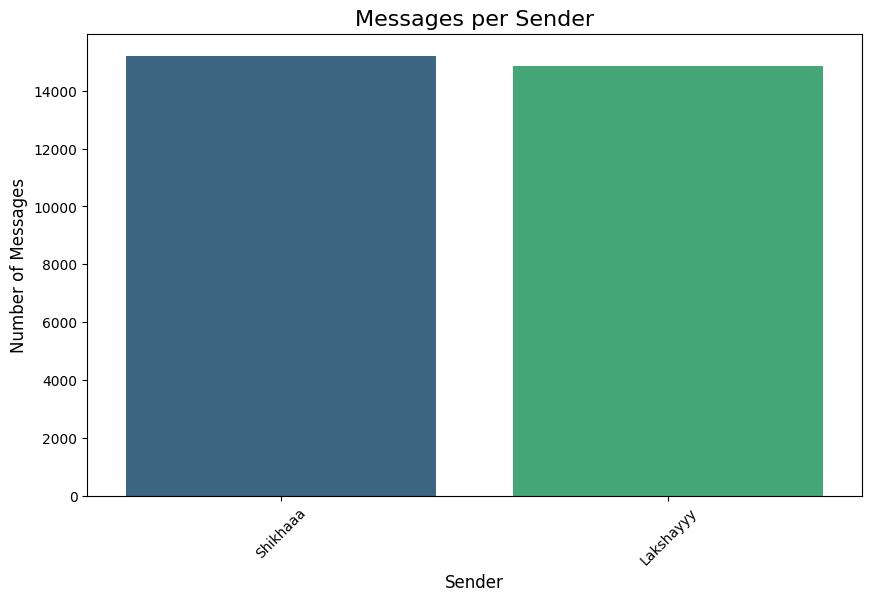

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=message_count.index, y=message_count.values, palette="viridis")
plt.title("Messages per Sender", fontsize=16)
plt.xlabel("Sender", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_16976\2838505560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_count.index, y=weekday_count.values, palette="coolwarm")


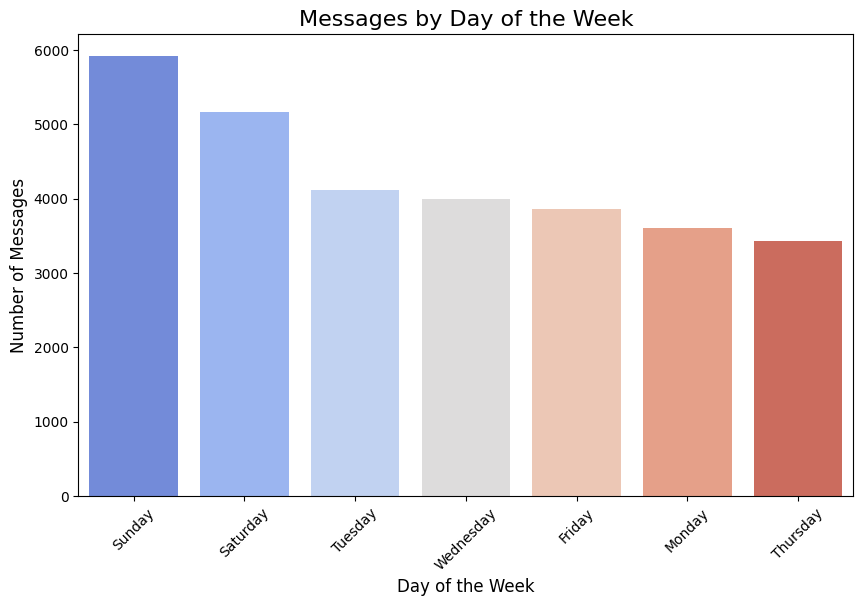

In [12]:
weekday_count = df['Day of Week'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_count.index, y=weekday_count.values, palette="coolwarm")
plt.title("Messages by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(rotation=45)
plt.show()

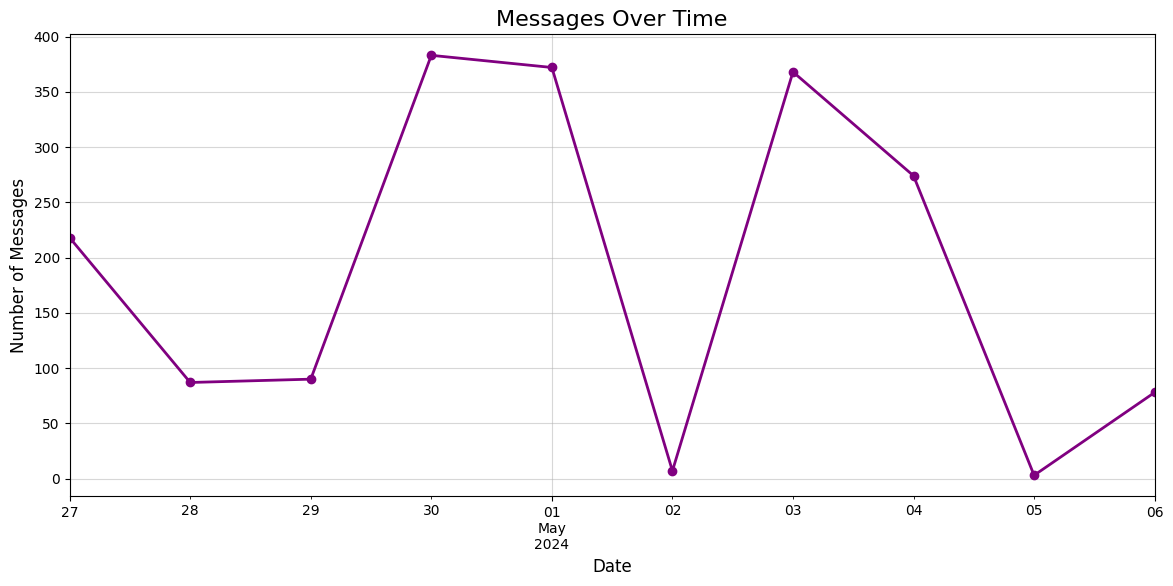

In [13]:
def plot_messages_over_time(df, start_date=None, end_date=None):
    # Filter data by the date range
    if start_date:
        df = df[df['Date'] >= pd.to_datetime(start_date)]
    if end_date:
        df = df[df['Date'] <= pd.to_datetime(end_date)]
    
    # Group by Date and count messages
    daily_messages = df.groupby(df['Date']).size()
    
    # Plotting
    plt.figure(figsize=(14, 6))
    daily_messages.plot(kind='line', color='purple', marker='o', linewidth=2)
    plt.title("Messages Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Messages", fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

# Example: Filter from '2023-05-01' to '2023-05-31'
plot_messages_over_time(df, start_date='2024-04-27', end_date='2024-05-06')

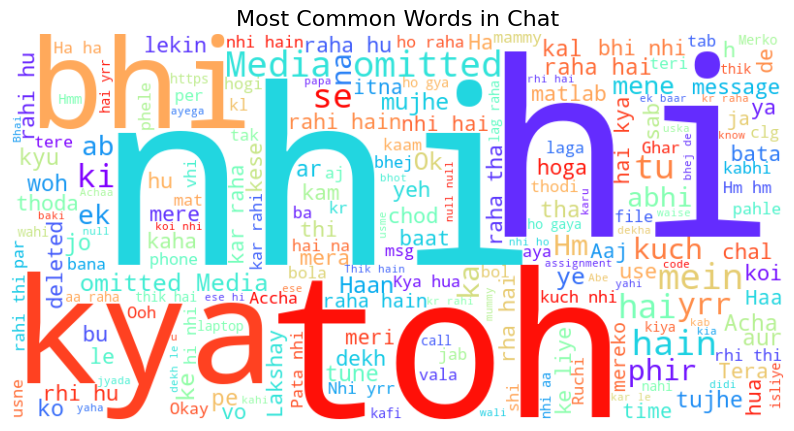

In [14]:
from wordcloud import WordCloud

text = ' '.join(message for message in df['Message'] if pd.notna(message))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rainbow').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Chat", fontsize=16)
plt.show()

In [15]:
import sys
print(sys.executable)

C:\Users\Lakshay\AppData\Local\Programs\Python\Python313\python.exe


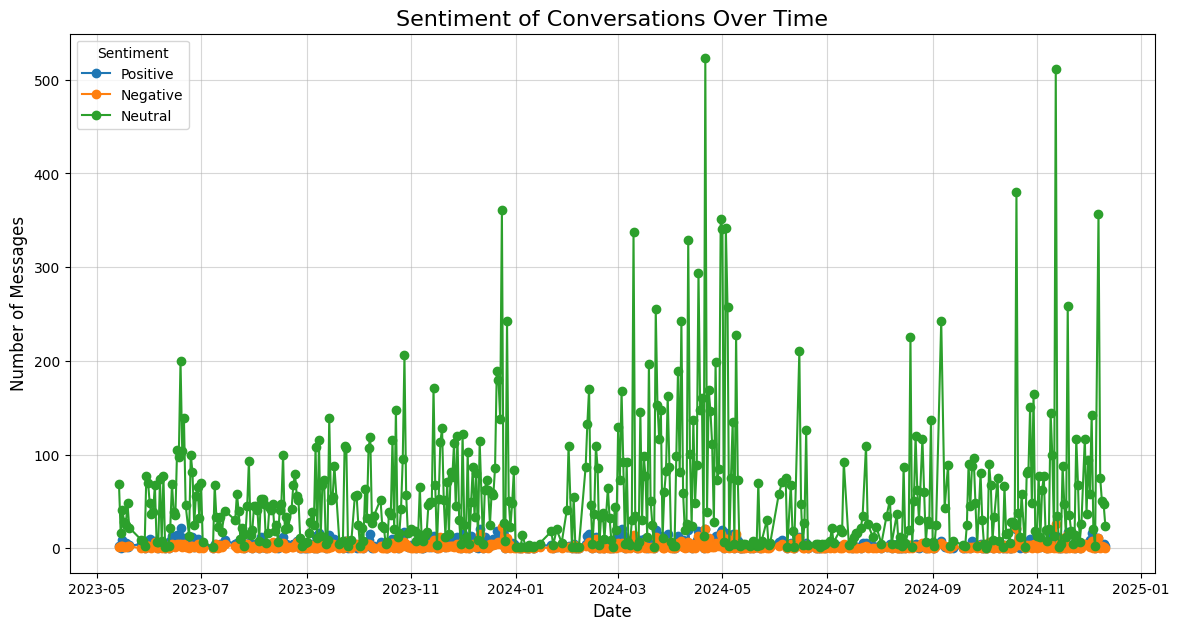

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the DataFrame

# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Step 1: Define a function to calculate sentiment
def get_sentiment(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

# Step 2: Apply sentiment analysis to each message
df['Sentiment'] = df['Message'].apply(get_sentiment)

# Step 3: Aggregate sentiments over time
daily_sentiment = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

# Step 4: Plot the sentiment trend over time
plt.figure(figsize=(14, 7))
for sentiment in ['Positive', 'Negative', 'Neutral']:
    plt.plot(daily_sentiment.index, daily_sentiment[sentiment], label=sentiment, marker='o')

plt.title("Sentiment of Conversations Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.legend(title="Sentiment")
plt.grid(alpha=0.5)
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from transformers import pipeline 

ModuleNotFoundError: No module named 'transformers'